#### Author: Tejaswini Patil
#### Reg No:20MAI0044
### Lab Assignment - 4: Task 2 - Implement the VGG 16 

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

In [2]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 46s 0us/step


c:\python3.6.6\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


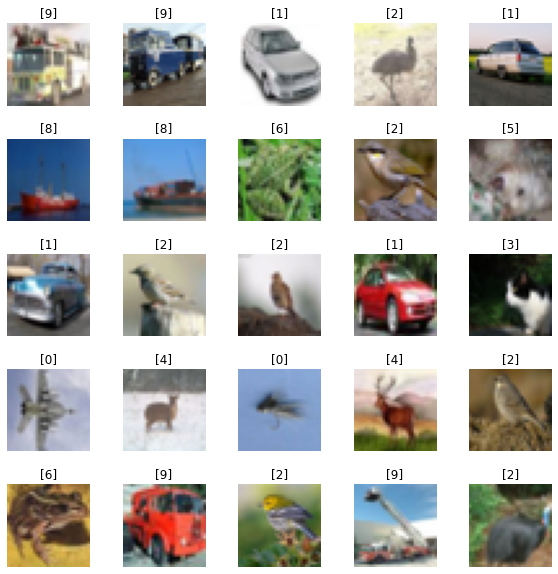

In [3]:
W_grid=5
L_grid=5
fig,axes = plt.subplots(L_grid,W_grid,figsize=(10,10))
axes=axes.ravel()
n_training=len(x_train)
for i in np.arange(0,L_grid * W_grid):
    index=np.random.randint(0,n_training) 
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index]) 
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [4]:
#Train-validation-test split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [5]:
#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [6]:
#Onehot Encoding the labels.
#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [7]:
#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [8]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2,  horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [9]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01,  patience=3, min_lr=1e-5)

In [10]:
#VGG16 Model
base_model_vgg16 = VGG16(include_top = False, weights= 'imagenet', input_shape = (32,32,3), classes = y_train.shape[1])

#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_vgg16= Sequential()
model_vgg16.add(base_model_vgg16) 
model_vgg16.add(Flatten())
#Adding the Dense layers along with activation and batch normalization
model_vgg16.add(Dense(1024,activation=('relu'),input_dim=512))
model_vgg16.add(Dense(512,activation=('relu'))) 
model_vgg16.add(Dense(256,activation=('relu'))) 
#model.add(Dropout(.3))
model_vgg16.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model_vgg16.add(Dense(10,activation=('softmax')))

#Checking the final VGG16 model summary
model_vgg16.summary()

58892288/58889256 [==============================] - 13s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
________________________________________________________

In [14]:
#Compiling VGG16
model_vgg16.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])


#Training VGG16
model_vgg16.fit_generator(train_generator.flow(x_train, y_train, batch_size = 50), 
                          epochs = 10, steps_per_epoch = x_train.shape[0]//batch_size, 
                          validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), 
                          validation_steps=250, callbacks=[lrr], verbose=1)

c:\python3.6.6\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
700/700 [==============================] - 157s 172ms/step - loss: 2.3287 - accuracy: 0.1770 - val_loss: 1.5669 - val_accuracy: 0.4370
Epoch 2/10
700/700 [==============================] - 120s 171ms/step - loss: 1.1217 - accuracy: 0.6150 - val_loss: 0.8045 - val_accuracy: 0.7313
Epoch 3/10
700/700 [==============================] - 121s 172ms/step - loss: 0.7166 - accuracy: 0.7610 - val_loss: 0.6822 - val_accuracy: 0.7727
Epoch 4/10
700/700 [==============================] - 119s 170ms/step - loss: 0.5418 - accuracy: 0.8175 - val_loss: 0.6793 - val_accuracy: 0.7707
Epoch 5/10
700/700 [==============================] - 119s 169ms/step - loss: 0.4706 - accuracy: 0.8401 - val_loss: 0.5240 - val_accuracy: 0.8230
Epoch 6/10
700/700 [==============================] - 118s 169ms/step - loss: 0.3934 - accuracy: 0.8628 - val_loss: 0.5692 - val_accuracy: 0.8132
Epoch 7/10
700/700 [==============================] - 119s 170ms/step - loss: 0.3302 - accuracy: 0.8865 - val_loss: 0.4993 -

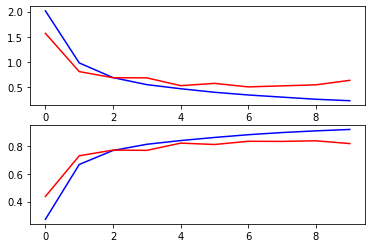

In [15]:
#Plotting the VGG16 training and validation loss
f,ax=plt.subplots(2,1) #Creates 2 subplots under 1 column
#Training loss and validation loss
ax[0].plot(model_vgg16.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model_vgg16.history.history['val_loss'],color='r',label='Validation Loss')
#Training accuracy and validation accuracy
ax[1].plot(model_vgg16.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model_vgg16.history.history['val_accuracy'],color='r',label='Validation Accuracy')

In [34]:
#Accuracy of VGG16
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred2)

0.8234